In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
Train=pd.read_csv('Desktop/Data/bigmart-sales-data/Train.csv')
Test=pd.read_csv('Desktop/Data/bigmart-sales-data/Test.csv')

In [3]:
print(Test.shape)
print(Train.shape)

(5681, 11)
(8523, 12)


In [4]:
data= pd.concat([Train,Test])

In [5]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


In [6]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  11765 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [8]:
data.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
dtype: int64

In [9]:
for cols in data.columns:
    if (data[cols].dtype=='object'):
        print(data[cols].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
NCK31    10
DRK13    10
FDP33    10
NCY41    10
DRA59    10
FDH21    10
FDX47    10
FDY39    10
NCN53    10
NCF19    10
FDD56    10
FDD46    10
FDT13    10
DRP47    10
NCZ30    10
FDE33    10
FDF41    10
FDA49    10
NCX30    10
DRH37    10
FDJ53    10
DRI11    10
NCX29    10
NCE31    10
NCG43    10
FDX40    10
FDX24    10
FDO01    10
FDM56    10
FDI16    10
         ..
FDV07     8
NCQ53     8
FDM16     8
DRN59     8
NCN05     8
FDO44     8
FDJ21     8
FDS50     8
FDC38     8
DRM35     8
FDF50     8
FDG24     8
FDB02     8
FDL10     8
FDA51     8
FDI35     8
NCL29     8
FDI46     7
FDX49     7
NCW54     7
FDS22     7
FDM50     7
FDO33     7
FDR51     7
NCL42     7
DRN11     7
FDH58     7
FDL50     7
FDM52     7
FDM10     7
Name: Item_Identifier, Length: 1559, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Food

In [10]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
# combining Item_Fat_Content misspelled
data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [12]:
# creating new column num_years
data['num_years'] = data['Outlet_Establishment_Year'].apply(lambda x: 2013 - x) 

In [13]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

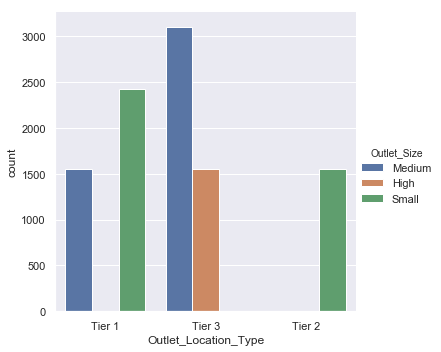

In [14]:
sns.factorplot('Outlet_Location_Type',data = data,hue ='Outlet_Size' ,kind='count')

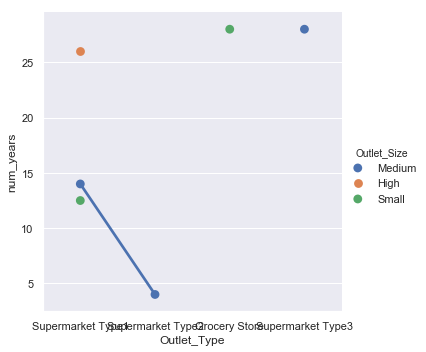

In [15]:
sns.factorplot('Outlet_Type','num_years',data = data, hue='Outlet_Size' )

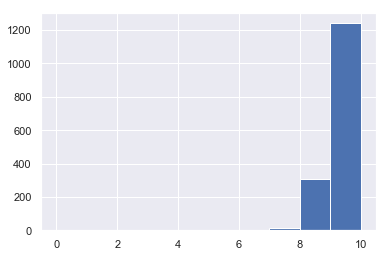

In [16]:
#Checking for the availability of items in outlets
item_count=data['Item_Identifier'].value_counts().sort_values()
plt.hist(item_count,bins=np.arange(0,11,1))
data['Item_Identifier'].describe()
plt.show()

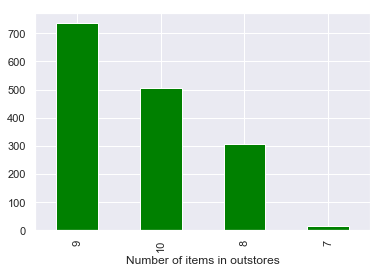

In [17]:
item_count_df=pd.DataFrame(item_count)
item_cnt=(item_count_df['Item_Identifier'].value_counts()/sum(item_count_df['Item_Identifier'])*100)
plt.xlabel('Number of items in outstores')
item_count_df['Item_Identifier'].value_counts().plot(kind='bar',color='green')

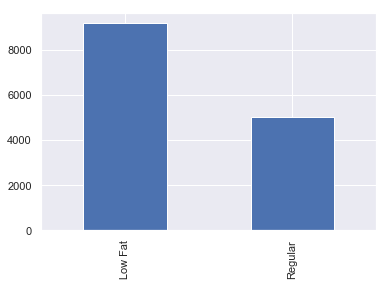

In [18]:
data['Item_Fat_Content'].value_counts().plot(kind='bar')

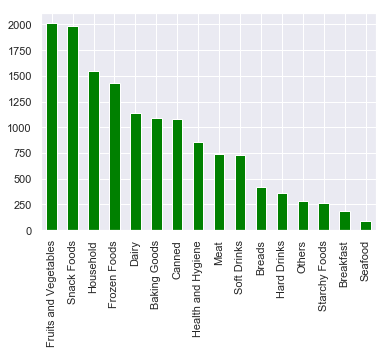

In [19]:
data['Item_Type'].value_counts().plot(kind='bar',color='green')

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store        [OUT010]
OUT013             Supermarket Type1    [OUT013]
OUT017             Supermarket Type1    [OUT017]
OUT018             Supermarket Type2    [OUT018]
OUT019             Grocery Store        [OUT019]
OUT027             Supermarket Type3    [OUT027]
OUT035             Supermarket Type1    [OUT035]
OUT045             Supermarket Type1    [OUT045]
OUT046             Supermarket Type1    [OUT046]
OUT049             Supermarket Type1    [OUT049]
Name: Outlet_Identifier, dtype: object

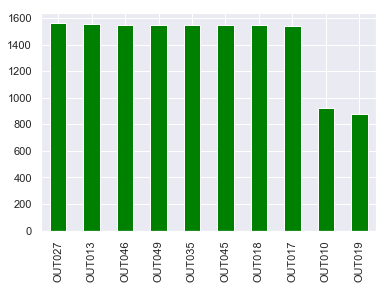

In [20]:
data['Outlet_Identifier'].value_counts().plot(kind='bar',color='green')
#train_set.sort_values(by='Item_Identifier')
data.groupby(['Outlet_Identifier','Outlet_Type'])['Outlet_Identifier'].unique()

In [21]:
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%'))
data['Year']=data['Outlet_Establishment_Year'].dt.year
data['Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Year, dtype: int64

In [22]:
# filling null values
data.fillna(data.mean(), inplace=True)
data['Outlet_Size'].fillna('Medium',inplace = True)

In [23]:
data.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
num_years                    0
Year                         0
dtype: int64

In [24]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [25]:
data['num_years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: num_years, dtype: float64

In [26]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
details = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in details:
    data[i] = le.fit_transform(data[i])

In [28]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [29]:
data.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,num_years,Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999-01-01,OUT049,14,1999,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009-01-01,OUT018,4,2009,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999-01-01,OUT049,14,1999,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998-01-01,OUT010,15,1998,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987-01-01,OUT013,26,1987,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [30]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

In [31]:
data.drop(['Item_Identifier', 'Outlet_Identifier'],axis=1,inplace=True)

In [32]:
data.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,num_years,Year,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,249.8092,3735.1380,0.016047,9.30,14,1999,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,48.2692,443.4228,0.019278,5.92,4,2009,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,141.6180,2097.2700,0.016760,17.50,14,1999,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,182.0950,732.3800,0.000000,19.20,15,1998,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
4,53.8614,994.7052,0.000000,8.93,26,1987,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [33]:
X = data.drop('Item_Outlet_Sales', axis = 1)
y = data.Item_Outlet_Sales

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

In [35]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regressor = LinearRegression() 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

[1661. 1828. 3441. ... 2636. 2120. 1254.]
RMSE : 1063.514500828239
Variance score: 0.32


In [36]:
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, y_train)
y_pred = XGB.predict(X_test)
print(y_pred)

# Calculating the root mean squared error
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))

[00:26:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[1585.635  1836.1078 3064.104  ... 2698.5347 2054.9229  996.6912]
RMSE : 1052.099318618242


In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(X_train, y_train))


C:\Users\Monika\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[1403.09362353 1935.20484647 2530.06896148 ... 2488.35352457 2172.47164442
 1298.80836024]
RMSE : 1125.6048425637755
Variance score: 0.24
Result : 0.8997997012840877


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

clf =GradientBoostingRegressor()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(X_train, y_train))

[1403.09362353 1935.20484647 2530.06896148 ... 2488.35352457 2172.47164442
 1298.80836024]
RMSE : 1125.6048425637755
Variance score: 0.24
Result : 0.8997997012840877
